In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dog-breed-identification

100% 691M/691M [00:37<00:00, 20.1MB/s]
100% 691M/691M [00:37<00:00, 19.6MB/s]


In [4]:
from zipfile import ZipFile


dataset = '/content/dog-breed-identification.zip'

with ZipFile (dataset,'r') as zip:
  zip.extractall()
  print('Extracted successfully')

Extracted successfully


In [5]:
import os
# Printing Names
file_names = os.listdir('/content/train')
print(file_names)

['4a226a3a9a4c748e8e20bcb13c9fd01e.jpg', '69c5d6ddfb492128c05de0829659a35a.jpg', '7efa3e0f614bb18b9ec8c18d5de0d5a9.jpg', '03564fbb4aba93dd80e5c7cd76f28d28.jpg', '7253af79b249400ca425291d9ee8ab8d.jpg', 'fd186806d3d7f123d9a568bcde794f6e.jpg', '212fac12fe3bfc0820cd6d05339765ab.jpg', '8436be99589db6a99cfac1b894421ea6.jpg', 'f9900b44f49e5075c5b3fb589d1aae4b.jpg', '4b2f8a39135f080e4830c0de981890da.jpg', '07a4fcb31d0c6259f5ec21a1f193bc39.jpg', '331c446e4c16a94020a99e2c934ec9f0.jpg', '2bc67c00874f3a6ba94acabebcba49be.jpg', 'f8c2b71ba0ee8fb0b64a589f12c98618.jpg', '694e8e593e55be4c673f97fdf70e3580.jpg', 'b3ce89788191e0f62e14820abd176628.jpg', 'ae1eb096845f419a35c1f3f5396c9ec2.jpg', '18fa3a34649877d88173d1e3c05c12ff.jpg', '854b95f91a0f65435da679bcdd3994b0.jpg', '13d470408dbbdc20b38ea32d3752edbb.jpg', 'af465eb9b2371bb3639518f0daa8529e.jpg', '131d708a270a3ebca285978bf53df62e.jpg', '83609f659965b2aa5d8c74fbc2bec49e.jpg', 'e76687c549303fb57aae9866739f44b8.jpg', '34e5e9ec00ea38b9109221140042a8fc.jpg',

In [6]:
#Importing Libraries

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import pandas as pd
from google.colab.patches import cv2_imshow

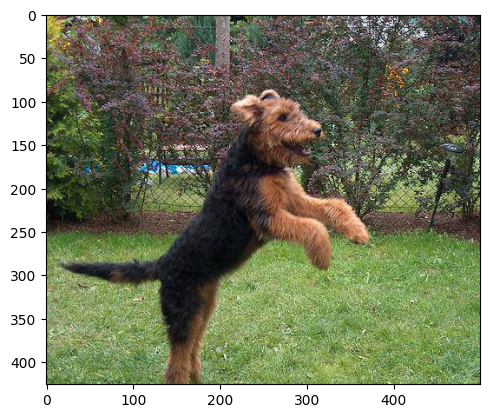

In [7]:
img = mpimg.imread('/content/train/3adb3fb45e6331c8905cb6cf85db9f11.jpg')
plt.imshow(img)

In [8]:
os.mkdir('/content/image resized')

In [9]:
from pyparsing import original_text_for
original_folder = '/content/train/'
resized_folder = '/content/image resized/'


for i in range(2000):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder+filename

  img = Image.open(image_path)
  img = img.resize((224,224))
  img = img.convert('RGB')


  newImgPath = resized_folder+filename
  img.save(newImgPath)

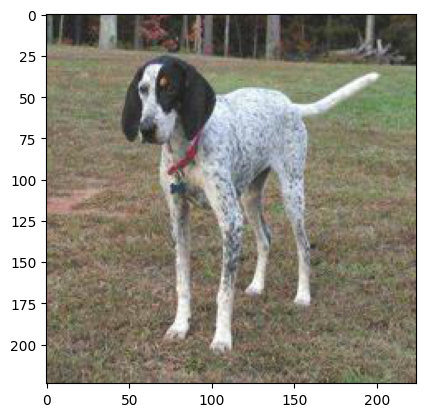

In [11]:
#Displaying resized dog image
img = mpimg.imread('/content/image resized/00214f311d5d2247d5dfe4fe24b2303d.jpg')
plt.imshow(img)

In [12]:
import os
import pandas as pd
path = '/content/train'
train_path = os.path.join(path,"/content/train/")
labels_path = os.path.join(path,"/content/labels.csv")
resized_path = os.path.join(path,"/content/image resized")


In [13]:
# Get a list of all image files in the resized image folder
image_files = os.listdir(resized_path)

# Extract the image IDs from the file names
image_ids = [filename.split('.')[0] for filename in image_files]

# Load the labels CSV file and filter it to only include labels for the image IDs in the resized image folder
labels_df = pd.read_csv(labels_path)
labels_df = labels_df[labels_df['id'].isin(image_ids)]

# Print out the number of images and labels found
print("Number of images found:", len(image_ids))
print("Number of labels found:", len(labels_df))

# Print out the image and label IDs
print("Image IDs:", image_ids)
print("Label IDs:", list(labels_df['id']))


Number of images found: 2000
Number of labels found: 2000
Image IDs: ['4a226a3a9a4c748e8e20bcb13c9fd01e', '69c5d6ddfb492128c05de0829659a35a', '7efa3e0f614bb18b9ec8c18d5de0d5a9', '03564fbb4aba93dd80e5c7cd76f28d28', '7253af79b249400ca425291d9ee8ab8d', 'fd186806d3d7f123d9a568bcde794f6e', '212fac12fe3bfc0820cd6d05339765ab', '8436be99589db6a99cfac1b894421ea6', 'f9900b44f49e5075c5b3fb589d1aae4b', '4b2f8a39135f080e4830c0de981890da', '07a4fcb31d0c6259f5ec21a1f193bc39', '331c446e4c16a94020a99e2c934ec9f0', '2bc67c00874f3a6ba94acabebcba49be', 'f8c2b71ba0ee8fb0b64a589f12c98618', '694e8e593e55be4c673f97fdf70e3580', 'b3ce89788191e0f62e14820abd176628', 'ae1eb096845f419a35c1f3f5396c9ec2', '18fa3a34649877d88173d1e3c05c12ff', '854b95f91a0f65435da679bcdd3994b0', '13d470408dbbdc20b38ea32d3752edbb', 'af465eb9b2371bb3639518f0daa8529e', '131d708a270a3ebca285978bf53df62e', '83609f659965b2aa5d8c74fbc2bec49e', 'e76687c549303fb57aae9866739f44b8', '34e5e9ec00ea38b9109221140042a8fc', '7f62b9937dbacb5827ba961e6dd65

In [14]:
labels_df

,id,breed
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
10,004396df1acd0f1247b740ca2b14616e,shetland_sheepdog
16,007b5a16db9d9ff9d7ad39982703e429,wire-haired_fox_terrier
...,...,...
10208,ffa6a8d29ce57eb760d0f182abada4bf,english_foxhound
10210,ffc1717fc5b5f7a6c76d0e4ea7c8f93a,great_dane
10214,ffcb610e811817766085054616551f9c,briard
10215,ffcde16e7da0872c357fbc7e2168c05f,airedale


In [15]:
breed = labels_df["breed"].unique()
breed

array(['bluetick', 'golden_retriever', 'bedlington_terrier',
       'shetland_sheepdog', 'wire-haired_fox_terrier', 'dingo',
       'labrador_retriever', 'groenendael', 'irish_water_spaniel',
       'basset', 'english_setter', 'collie', 'saluki', 'komondor',
       'leonberg', 'irish_setter', 'bernese_mountain_dog',
       'rhodesian_ridgeback', 'pekinese', 'clumber', 'walker_hound',
       'otterhound', 'scottish_deerhound', 'scotch_terrier', 'borzoi',
       'american_staffordshire_terrier', 'english_foxhound',
       'ibizan_hound', 'border_terrier', 'greater_swiss_mountain_dog',
       'newfoundland', 'doberman', 'italian_greyhound',
       'west_highland_white_terrier', 'kerry_blue_terrier',
       'norfolk_terrier', 'shih-tzu', 'toy_poodle', 'weimaraner',
       'basenji', 'irish_terrier', 'boxer', 'chow', 'norwegian_elkhound',
       'kelpie', 'miniature_schnauzer', 'silky_terrier',
       'miniature_poodle', 'afghan_hound', 'redbone', 'bloodhound',
       'mexican_hairless', 's

In [16]:
num_classes = len(breed)
num_classes

120

In [17]:
#One hot encoding of breed
from glob import glob
import numpy as np

breed2id = {name: i for i, name in enumerate(breed)}
ids = glob(resized_path + '/*.jpg')
labels = []

print("Number of images found:", len(ids))

for image_path in ids:
    image_id = image_path.split("/")[-1].split(".")[0]
    breed_name = None
    try:
        breed_name = list(labels_df[labels_df.id==image_id]["breed"])[0]
    except IndexError:
        pass
    if breed_name is not None and breed_name in breed2id:
        breed_index = breed2id[breed_name]
        labels.append(breed_index)
    else:
        labels.append(np.nan) # or some other default value

print("Number of labels found:", len(labels))
        
labels = np.array(labels)
labels = np.where(np.isnan(labels), 0, labels) # replace NaN with 0
labels_onehot = np.zeros((labels.shape[0], num_classes))
labels_onehot[np.arange(labels.shape[0]), labels.astype(int)] = 1



Number of images found: 2000
Number of labels found: 2000


In [18]:
print(ids)
print(labels)

['/content/image resized/4a226a3a9a4c748e8e20bcb13c9fd01e.jpg', '/content/image resized/69c5d6ddfb492128c05de0829659a35a.jpg', '/content/image resized/7efa3e0f614bb18b9ec8c18d5de0d5a9.jpg', '/content/image resized/03564fbb4aba93dd80e5c7cd76f28d28.jpg', '/content/image resized/7253af79b249400ca425291d9ee8ab8d.jpg', '/content/image resized/fd186806d3d7f123d9a568bcde794f6e.jpg', '/content/image resized/212fac12fe3bfc0820cd6d05339765ab.jpg', '/content/image resized/8436be99589db6a99cfac1b894421ea6.jpg', '/content/image resized/f9900b44f49e5075c5b3fb589d1aae4b.jpg', '/content/image resized/4b2f8a39135f080e4830c0de981890da.jpg', '/content/image resized/07a4fcb31d0c6259f5ec21a1f193bc39.jpg', '/content/image resized/331c446e4c16a94020a99e2c934ec9f0.jpg', '/content/image resized/2bc67c00874f3a6ba94acabebcba49be.jpg', '/content/image resized/f8c2b71ba0ee8fb0b64a589f12c98618.jpg', '/content/image resized/694e8e593e55be4c673f97fdf70e3580.jpg', '/content/image resized/b3ce89788191e0f62e14820abd1766

In [19]:
print(labels_onehot[0:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
import cv2
import glob
image_directory = '/content/image resized/'
image_extension = ['png','jpg']


files = []
[files.extend(glob.glob(image_directory + '*.' + e))for e in image_extension]


dog_breed_images = np.asarray([cv2.imread(file) for file in files])

In [21]:
print(dog_breed_images)

[[[[ 73  34  25]
   [ 70  31  22]
   [ 88  50  38]
   ...
   [116 115 111]
   [140 136 125]
   [ 96  89  74]]

  [[ 90  53  45]
   [ 84  48  38]
   [ 96  60  50]
   ...
   [129 130 126]
   [111 106  97]
   [ 87  81  68]]

  [[ 81  49  43]
   [ 74  42  36]
   [ 84  51  42]
   ...
   [121 122 120]
   [ 83  80  72]
   [ 82  78  67]]

  ...

  [[ 32  49  15]
   [ 28  45  11]
   [ 28  44  10]
   ...
   [ 29  47  16]
   [ 23  43  14]
   [ 25  45  16]]

  [[ 26  44   7]
   [ 28  46   9]
   [ 35  52  15]
   ...
   [ 36  54  23]
   [ 24  44  15]
   [ 22  41  14]]

  [[ 17  36   0]
   [ 27  46   7]
   [ 42  60  21]
   ...
   [ 31  49  18]
   [ 26  45  18]
   [ 29  48  21]]]


 [[[  2  61 110]
   [  3  62 111]
   [  2  64 112]
   ...
   [  5  80 124]
   [  3  78 122]
   [  2  77 121]]

  [[  3  62 111]
   [  3  62 111]
   [  2  64 112]
   ...
   [  5  80 124]
   [  4  79 123]
   [  2  77 121]]

  [[  4  64 110]
   [  4  64 110]
   [  3  65 111]
   ...
   [  3  81 124]
   [  2  80 123]
   [  0  78

In [22]:
print(dog_breed_images.shape)

(2000, 224, 224, 3)


In [23]:
print(labels_onehot.shape)

(2000, 120)


In [24]:
X = dog_breed_images
Y = np.asarray(labels_onehot)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
# size of image
X_train[0].shape

(224, 224, 3)

In [27]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [28]:
#Loading VGG19 model
base_model = VGG19(weights='imagenet',include_top=False,input_shape=X_train[0].shape)
#include_top means that fully connected layers will not be include 

80134624/80134624 [==============================] - 5s 0us/step


In [29]:
#we will not train our base model so
base_model.trainable = False

In [30]:
# preprocess the input of test and train data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [31]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
from tensorflow.keras import layers, models
model=models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(50,activation = 'relu'),
    layers.Dense(20,activation = 'relu'),
    layers.Dense(120,activation = 'softmax')
])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


In [34]:
es = EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=True)

In [35]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2,batch_size=8,callbacks=[es])

Epoch 1/10
160/160 [==============================] - 25s 79ms/step - loss: 5.1206 - accuracy: 0.0117 - val_loss: 4.8256 - val_accuracy: 0.0000e+00
Epoch 2/10
160/160 [==============================] - 11s 71ms/step - loss: 4.8679 - accuracy: 0.0172 - val_loss: 4.7852 - val_accuracy: 0.0000e+00
Epoch 3/10
160/160 [==============================] - 12s 74ms/step - loss: 4.7875 - accuracy: 0.0211 - val_loss: 4.8162 - val_accuracy: 0.0000e+00
Epoch 4/10
160/160 [==============================] - 12s 75ms/step - loss: 4.8035 - accuracy: 0.0258 - val_loss: 4.7837 - val_accuracy: 0.0000e+00
Epoch 5/10
160/160 [==============================] - 12s 75ms/step - loss: 4.7550 - accuracy: 0.0273 - val_loss: 4.7886 - val_accuracy: 0.0000e+00
Epoch 6/10
160/160 [==============================] - 12s 75ms/step - loss: 4.7383 - accuracy: 0.0266 - val_loss: 4.7832 - val_accuracy: 0.0000e+00


Path of image to be predicted:/content/Borzoi.jpg


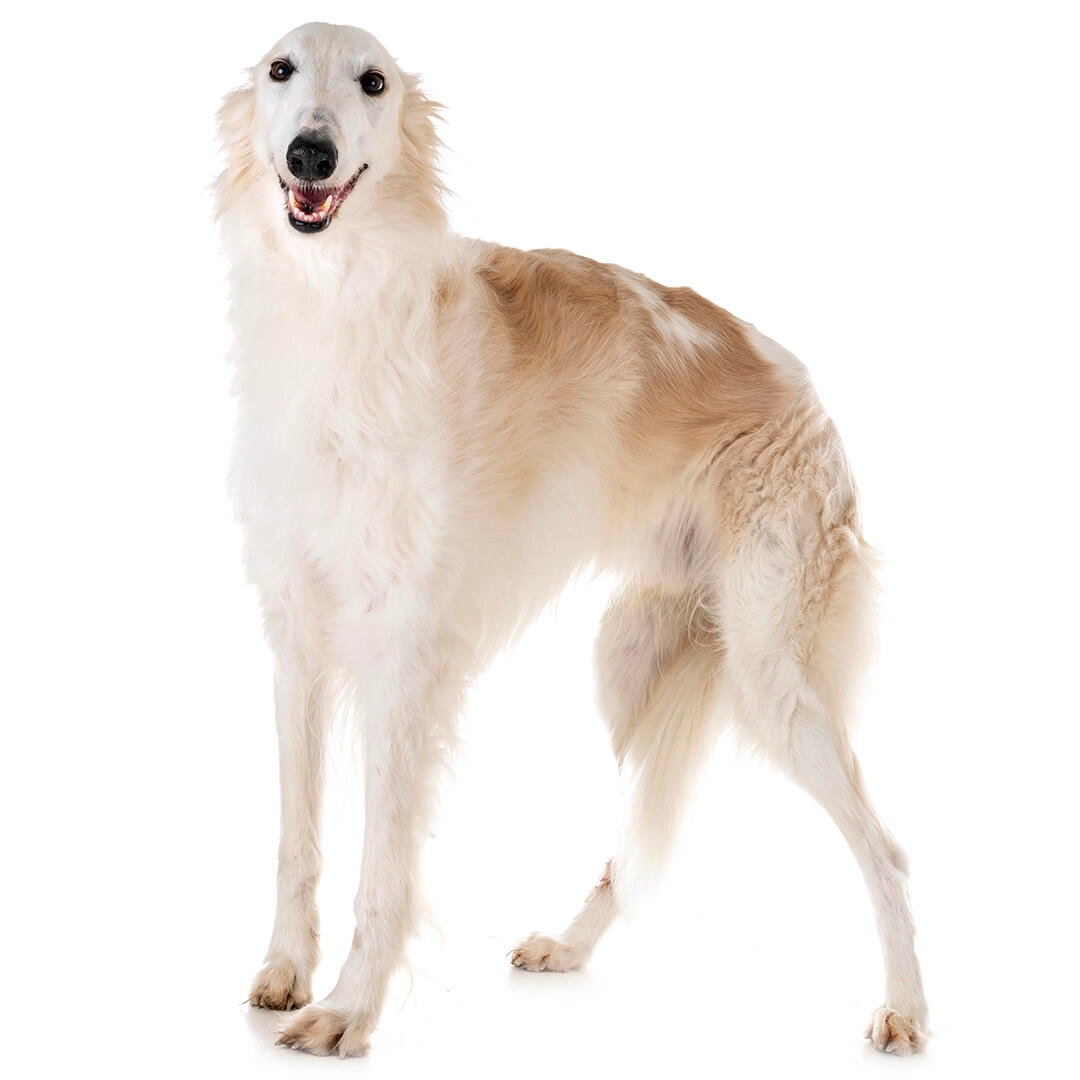

1/1 [==============================] - 1s 795ms/step
Predicted breed: dingo


In [36]:
breed_names = ['dingo', 'borzoi', 'wire-haired_fox_terrier', 'boxer',
       'golden_retriever', 'irish_water_spaniel', 'labrador_retriever',
       'giant_schnauzer', 'groenendael', 'greater_swiss_mountain_dog',
       'brittany_spaniel', 'english_setter', 'border_collie', 'collie',
       'weimaraner', 'entlebucher', 'leonberg', 'saluki',
       'miniature_schnauzer', 'pekinese', 'lakeland_terrier',
       'irish_setter', 'scotch_terrier', 'cairn', 'afghan_hound',
       'bedlington_terrier', 'maltese_dog', 'bernese_mountain_dog',
       'american_staffordshire_terrier', 'soft-coated_wheaten_terrier',
       'clumber', 'siberian_husky', 'briard', 'chesapeake_bay_retriever',
       'dandie_dinmont', 'basset', 'rhodesian_ridgeback',
       'kerry_blue_terrier', 'australian_terrier', 'english_foxhound',
       'african_hunting_dog', 'appenzeller', 'standard_schnauzer',
       'standard_poodle', 'flat-coated_retriever', 'basenji', 'kuvasz',
       'whippet', 'pomeranian', 'curly-coated_retriever',
       'shetland_sheepdog', 'papillon', 'miniature_pinscher',
       'great_dane', 'shih-tzu', 'blenheim_spaniel', 'komondor',
       'sussex_spaniel', 'great_pyrenees', 'bloodhound',
       'german_short-haired_pointer', 'redbone', 'walker_hound',
       'mexican_hairless', 'cardigan', 'keeshond', 'tibetan_mastiff',
       'tibetan_terrier', 'italian_greyhound', 'malamute', 'boston_bull',
       'newfoundland', 'ibizan_hound', 'otterhound', 'chow', 'pembroke',
       'cocker_spaniel', 'gordon_setter', 'pug', 'miniature_poodle',
       'old_english_sheepdog', 'norwegian_elkhound', 'bluetick',
       'airedale', 'toy_poodle', 'scottish_deerhound', 'border_terrier',
       'chihuahua', 'silky_terrier', 'samoyed', 'affenpinscher',
       'norwich_terrier', 'staffordshire_bullterrier', 'schipperke',
       'yorkshire_terrier', 'vizsla', 'lhasa', 'norfolk_terrier',
       'french_bulldog', 'bouvier_des_flandres', 'malinois',
       'japanese_spaniel', 'brabancon_griffon', 'irish_wolfhound',
       'eskimo_dog', 'doberman', 'english_springer', 'sealyham_terrier',
       'bull_mastiff', 'dhole', 'black-and-tan_coonhound', 'toy_terrier',
       'rottweiler', 'kelpie', 'irish_terrier',
       'west_highland_white_terrier', 'beagle', 'saint_bernard',
       'german_shepherd', 'welsh_springer_spaniel']
input_image_path = input("Path of image to be predicted:" )
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(input_reshaped)
input_pred_label = np.argmax(input_prediction)
breed_prediction = breed_names[input_pred_label]
print('Predicted breed:', breed_prediction)
